In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
glass_data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")

In [8]:
glass_data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [9]:
glass_data.sample(10)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
39,41,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.00,1
41,43,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00,1
132,134,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2
126,128,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17,2
122,124,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00,2
127,129,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17,2
13,15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1
212,214,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7
171,173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
75,77,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.00,0.00,2


In [12]:
glass_data.shape

(213, 11)

In [13]:
glass_data.isna().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

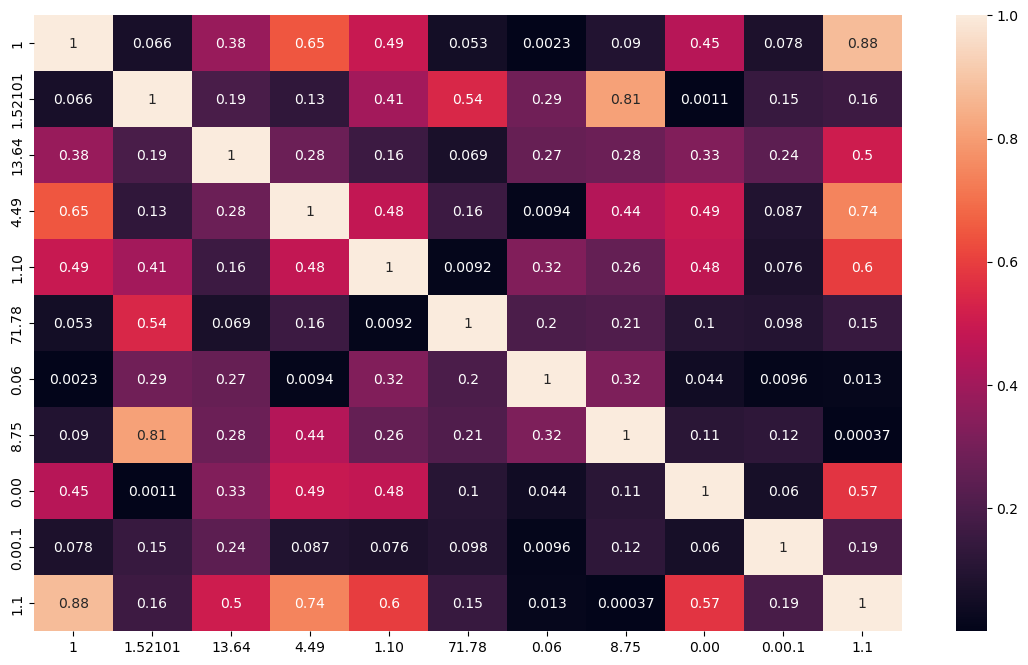

In [18]:
df_corr=glass_data.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [21]:
# Load the dataset with skipping the first row
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv"
glass_data = pd.read_csv(url, skiprows=1)

# Check the columns in the DataFrame
print(glass_data.columns)


Index(['2', '1.51761', '13.89', '3.60', '1.36', '72.73', '0.48', '7.83',
       '0.00', '0.00.1', '1'],
      dtype='object')


In [22]:
# Define column names based on the dataset description
column_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

# Load the dataset with explicitly specifying column names and skipping the first row
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv"
glass_data = pd.read_csv(url, skiprows=1, names=column_names)

# Check the columns in the DataFrame
print(glass_data.columns)

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')


In [23]:
glass_data.sample(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
35,37,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.0,1
182,184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.0,6
181,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.0,6
142,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.0,2
170,172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.0,5
98,100,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.0,2
25,27,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.00,0.0,1
83,85,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.0,2
164,166,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.0,5
136,138,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.0,2


In [24]:
X = glass_data.drop(columns=['Type of glass'])
y = glass_data['Type of glass']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

SVC(C=1)

In [28]:
y_pred = svm_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 9  1  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.62      1.00      0.77        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.79        43
   macro avg       0.77      0.61      0.65        43
weighted avg       0.80      0.79      0.76        43



C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
